In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463315 sha256=fc7c7294cdc61ddd4dd8fb85e7bf65441678cfb8730c7919368d04a9ae651fd5
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset,Reader
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.similarities import cosine
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.accuracy import mae,rmse

df_movies = pd.read_csv('/content/drive/MyDrive/CF-KNN-Surprise/ml-latest-small/movies.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/CF-KNN-Surprise/ml-latest-small/ratings.csv')

reader = Reader(rating_scale=(1, 5))

In [ ]:
# Menggabungkan movies_csv dan ratings_csv menggunakan pd.merge dengan kunci 'movieId'

df_merged = pd.merge(df_ratings, df_movies, on='movieId')
df_merged[['userId', 'movieId', 'rating','timestamp','title','genres']]

,userId,movieId,rating,timestamp,title,genres
0,1,1,4,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5,1494273047,Get Out (2017),Horror
100834,610,168252,5,1493846352,Logan (2017),Action|Sci-Fi


In [ ]:
movie_data = df_merged[['userId', 'movieId', 'rating']]

In [ ]:
# Membuat user_item_matrix menggunakan pivot tabel
user_item_matrix = movie_data.pivot_table(index='userId', columns='movieId', values='rating')

# isi NaN values dengan 0
user_item_matrix = user_item_matrix.fillna(0)

user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Splitting Data 95:5

movie_data = movie_data.sample(frac=1,random_state=42)
split_index = int(0.95 * len(movie_data))
train_movie_df = movie_data[:split_index]
test_movie_df = movie_data[split_index:]

train_movie_data = Dataset.load_from_df(train_movie_df[['userId', 'movieId', 'rating']], reader)
test_movie_data = Dataset.load_from_df(test_movie_df[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Mendefinisikan parameter grid untuk GridSearchCV
param_grid = {
    'min_k': (range(1,16)),
    'sim_options': {
        'name': ['cosine'],
        'user_based': [True]
    }
}

# Menggunakan GridSearchCV untuk hyperparameter
gs_movie = GridSearchCV(KNNBasic, param_grid, measures=['mae'], cv=10)

# Melatih model dengan GridSearchCV
gs_movie.fit(train_movie_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
# Melihat hasil evaluasi GridSearchCV
results_movie = pd.DataFrame(gs_movie.cv_results)

results_movie[['rank_test_mae','mean_test_mae',
         'std_test_mae','param_min_k','params','split0_test_mae',
         'split1_test_mae','split2_test_mae','split3_test_mae','split4_test_mae','split5_test_mae',
          'split6_test_mae','split7_test_mae','split8_test_mae','split9_test_mae']]

,rank_test_mae,mean_test_mae,std_test_mae,param_min_k,params,split0_test_mae,split1_test_mae,split2_test_mae,split3_test_mae,split4_test_mae,split5_test_mae,split6_test_mae,split7_test_mae,split8_test_mae,split9_test_mae
0,10,0.720901,0.007418,1,"{'min_k': 1, 'sim_options': {'name': 'cosine',...",0.719084,0.724081,0.710675,0.738122,0.714204,0.715715,0.723038,0.727190,0.720424,0.716474
1,5,0.716599,0.008377,2,"{'min_k': 2, 'sim_options': {'name': 'cosine',...",0.715406,0.721740,0.704667,0.736597,0.708719,0.712522,0.717322,0.722130,0.714423,0.712470
2,2,0.715846,0.008557,3,"{'min_k': 3, 'sim_options': {'name': 'cosine',...",0.714731,0.722059,0.703697,0.736120,0.709284,0.711211,0.714500,0.722263,0.712988,0.711606
3,3,0.715984,0.008303,4,"{'min_k': 4, 'sim_options': {'name': 'cosine',...",0.715572,0.721574,0.703506,0.735035,0.709874,0.710741,0.714269,0.723281,0.713476,0.712514
4,1,0.715831,0.008374,5,"{'min_k': 5, 'sim_options': {'name': 'cosine',...",0.716387,0.721806,0.703450,0.734889,0.710130,0.708979,0.714550,0.722736,0.713011,0.712373
5,4,0.716463,0.008711,6,"{'min_k': 6, 'sim_options': {'name': 'cosine',...",0.716256,0.722305,0.702753,0.736407,0.709920,0.710768,0.714740,0.723447,0.714063,0.713974
6,6,0.717214,0.009027,7,"{'min_k': 7, 'sim_options': {'name': 'cosine',...",0.718000,0.724089,0.703854,0.736871,0.710246,0.711125,0.714969,0.726252,0.713069,0.713667
7,7,0.718022,0.009448,8,"{'min_k': 8, 'sim_options': {'name': 'cosine',...",0.720015,0.725444,0.704752,0.738293,0.709924,0.712217,0.714709,0.727753,0.712639,0.714474
8,8,0.718763,0.009417,9,"{'min_k': 9, 'sim_options': {'name': 'cosine',...",0.720945,0.725303,0.705369,0.738584,0.710425,0.712970,0.715352,0.729416,0.713094,0.716172
9,9,0.719601,0.009554,10,"{'min_k': 10, 'sim_options': {'name': 'cosine'...",0.721827,0.726331,0.706010,0.739596,0.710674,0.714552,0.716462,0.730505,0.713944,0.716114


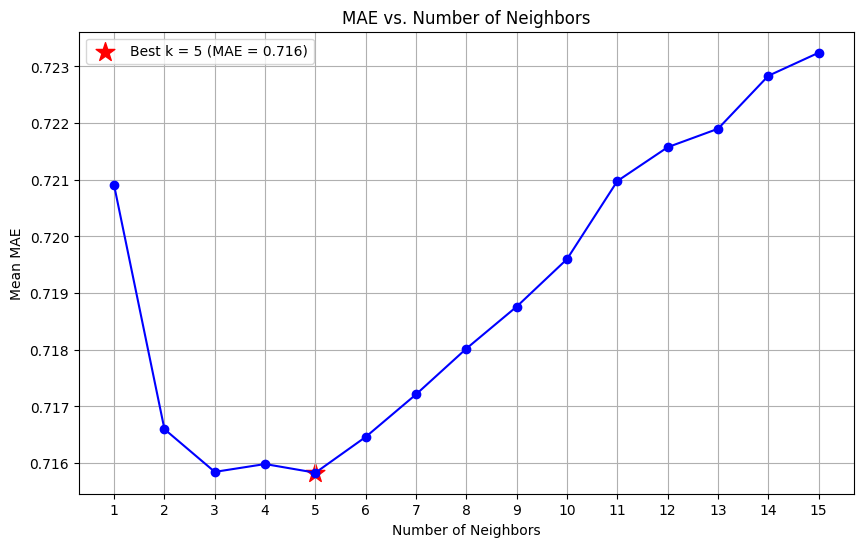

In [ ]:
import matplotlib.pyplot as plt

# Plot MAE vs. k
plt.figure(figsize=(10, 6))
plt.plot(results_movie['param_min_k'], results_movie['mean_test_mae'], marker='o', color='blue')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MAE')
plt.title('MAE vs. Number of Neighbors')
plt.grid(True)

# Menemukan K terbaik
best_k = results_movie.loc[results_movie['mean_test_mae'].idxmin()]['param_min_k']
best_mae = results_movie['mean_test_mae'].min()

# Highlight K terbaik dengan mark *
plt.scatter(best_k, best_mae, marker='*', s=200, color='red', label=f'Best k = {best_k} (MAE = {best_mae:.3f})')
plt.legend()

# Mengatur x_axis ke int
plt.xticks(results_movie['param_min_k'].astype(int))

plt.show()

In [ ]:
# Mendapatkan model terbaik berdasarkan MAE
best_movie_model = gs_movie.best_estimator['mae']
print("Parameter terbaik berdasarkan MAE:", gs_movie.best_params['mae'])

Parameter terbaik berdasarkan MAE: {'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [ ]:
# Melatih Parameter Terbaik
trainset_movie = train_movie_data.build_full_trainset()

best_movie_model.fit(trainset_movie)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# Ambil matriks similarity
movie_sim = best_movie_model.sim

#Mendapatkan daftar user
daftar_user_movie = trainset_movie.to_inner_uid(trainset_movie.n_users) # This line was incorrect
user_movie_ids = [trainset_movie.to_raw_uid(inner_id) for inner_id in range(trainset_movie.n_users)] # Use trainset_weekday directly

# Konversi ke DataFrame untuk visualisasi
import pandas as pd
movie_sim_df = pd.DataFrame(movie_sim, index=user_movie_ids, columns=user_movie_ids)

# Urutkan indeks (dan kolom) berdasarkan userId asli
movie_sim_df = movie_sim_df.sort_index(axis=0).sort_index(axis=1)

# Tampilkan sebagian matriks similarity
print("Matriks Cosine Similarity :")
daftar_user_movie
movie_sim_df

Matriks Cosine Similarity :


,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,1.000000,0.844826,0.957061,0.972672,0.939243,0.956244,0.977732,0.992781,0.864190,...,0.991839,0.958830,0.935892,0.952655,0.937872,0.969491,0.961660,0.962036,0.975417,0.980541
2,1.000000,1.000000,0.000000,0.000000,1.000000,0.989949,0.936586,1.000000,0.000000,0.862842,...,0.974214,1.000000,1.000000,0.000000,0.000000,0.992159,1.000000,0.980101,1.000000,0.989683
3,0.844826,0.000000,1.000000,1.000000,1.000000,0.858128,0.000000,1.000000,0.000000,0.000000,...,0.839570,0.672673,0.943180,0.000000,1.000000,0.773173,0.675012,0.763542,0.000000,0.903327
4,0.957061,0.000000,1.000000,1.000000,0.887170,0.917041,0.964981,0.894855,1.000000,0.850483,...,0.904232,0.923093,0.931918,0.880368,0.965269,0.942382,0.920957,0.893324,0.867533,0.942679
5,0.972672,1.000000,1.000000,0.887170,1.000000,0.939053,0.951275,0.949455,0.000000,0.812404,...,0.980666,0.952896,0.930948,0.962482,0.946685,0.958703,0.950256,0.937717,0.980429,0.963161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.969491,0.992159,0.773173,0.942382,0.958703,0.950948,0.947856,0.971043,0.980796,0.931709,...,0.989225,0.958641,0.955624,0.975851,0.970107,1.000000,0.952925,0.958631,0.985516,0.975379
607,0.961660,1.000000,0.675012,0.920957,0.950256,0.964107,0.974025,0.967198,0.000000,0.847319,...,0.993011,0.954924,0.936389,0.968450,0.933335,0.952925,1.000000,0.961701,0.979877,0.962575
608,0.962036,0.980101,0.763542,0.893324,0.937717,0.929475,0.946855,0.967202,0.949082,0.885120,...,0.987236,0.951244,0.929657,0.956257,0.945489,0.958631,0.961701,1.000000,0.978922,0.962687
609,0.975417,1.000000,0.000000,0.867533,0.980429,0.966005,0.978300,0.973497,0.000000,0.857493,...,0.999512,0.970999,0.956772,0.988454,0.954864,0.985516,0.979877,0.978922,1.000000,0.960322


In [ ]:
# Konversi data uji ke format testset yang digunakan surprise
testset_movie = test_movie_data.build_full_trainset().build_testset()

# Gunakan model terbaik untuk membuat prediksi
predictions_act = best_movie_model.test(testset_movie)

# Bandingkan rating aktual dan prediksi
predictions_act_df = pd.DataFrame(
    [(pred.uid, pred.iid, pred.r_ui, pred.est) for pred in predictions_act],
    columns=['userId', 'movieId', 'actual_rating', 'predicted_rating']
)

# Gabungkan dengan df_movies untuk menambahkan title dan genres
predictions_act_df = pd.merge(predictions_act_df, df_movies[['movieId', 'title', 'genres']], on='movieId', how='left')

# Tampilkan hasil

predictions_act_df_sorted = predictions_act_df.sort_values(by=['actual_rating', 'predicted_rating'], ascending=False)
predictions_act_df_sorted

,userId,movieId,actual_rating,predicted_rating,title,genres
491,414,177593,5.0,5.000000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
1347,318,177593,5.0,5.000000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
5026,251,2959,5.0,4.800216,Fight Club (1999),Action|Crime|Drama|Thriller
4011,171,318,5.0,4.774737,"Shawshank Redemption, The (1994)",Crime|Drama
3639,352,4993,5.0,4.750412,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
...,...,...,...,...,...,...
4804,287,1972,1.0,2.464206,"Nightmare on Elm Street 5: The Dream Child, A ...",Horror
30,489,374,1.0,2.459448,Richie Rich (1994),Children|Comedy
676,469,2412,1.0,2.317655,Rocky V (1990),Action|Drama
951,596,1499,1.0,2.247997,Anaconda (1997),Action|Adventure|Thriller


In [ ]:
predictions_act_df_sorted[predictions_act_df_sorted['userId'] == 1].head(10)

,userId,movieId,actual_rating,predicted_rating,title,genres
2746,1,5060,5.0,4.027641,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War
2747,1,2353,5.0,4.025953,Enemy of the State (1998),Action|Thriller
2749,1,3448,5.0,4.001142,"Good Morning, Vietnam (1987)",Comedy|Drama|War
2744,1,3729,5.0,3.758054,Shaft (1971),Action|Crime|Drama|Thriller
2743,1,3386,5.0,3.620378,JFK (1991),Drama|Mystery|Thriller
2745,1,2116,5.0,3.285870,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy
2750,1,3440,4.0,2.545959,Teenage Mutant Ninja Turtles III (1993),Action|Adventure|Children|Comedy|Fantasy
2748,1,1009,3.0,3.428069,Escape to Witch Mountain (1975),Adventure|Children|Fantasy


In [ ]:
import pandas as pd
from collections import defaultdict

def get_top_n(predictions_movie, df_movies, n=10):
    # Petakan prediksi ke setiap pengguna
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions_movie:
        # Cari informasi film dari df_movies
        movie_info = df_movies[df_movies['movieId'] == iid]

        if not movie_info.empty:
            title = movie_info['title'].values[0]
            genres = movie_info['genres'].values[0]
            top_n[uid].append((uid, iid, est, title, genres))

    # Urutkan prediksi untuk setiap pengguna dan ambil k prediksi teratasnya
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Prediksi
testset_predict = trainset_movie.build_anti_testset()
predictions_movie = best_movie_model.test(testset_predict)

# Dapatkan top-n rekomendasi
top_n = get_top_n(predictions_movie, df_movies, n=10)

# Buat list untuk menyimpan semua rekomendasi
all_recommendations = []

# Tambahkan rekomendasi ke list
for uid, user_ratings in top_n.items():
    all_recommendations.extend(user_ratings)

# Buat DataFrame dari rekomendasi
recommendations_df = pd.DataFrame(all_recommendations,
                                  columns=['userId', 'movieId', 'predicted_ratings', 'title', 'genres'])

# Tampilkan DataFrame
recommendations_df.head(10)

,userId,movieId,predicted_ratings,title,genres
0,332,158966,5.000000,Captain Fantastic (2016),Drama
1,332,177593,5.000000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
2,332,6460,5.000000,"Trial, The (Procès, Le) (1962)",Drama
3,332,31364,4.799055,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
4,332,8132,4.715669,Gladiator (1992),Action|Drama
5,332,106642,4.710454,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi
6,332,2360,4.671477,"Celebration, The (Festen) (1998)",Drama
7,332,2239,4.668267,Swept Away (Travolti da un insolito destino ne...,Comedy|Drama
8,332,7234,4.667336,"Strada, La (1954)",Drama
9,332,1178,4.665496,Paths of Glory (1957),Drama|War


In [ ]:
recommendations_df[recommendations_df['userId']==1]

,userId,movieId,predicted_ratings,title,genres
20,1,158966,5.000000,Captain Fantastic (2016),Drama
21,1,177593,5.000000,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
22,1,6460,5.000000,"Trial, The (Procès, Le) (1962)",Drama
23,1,31364,4.800457,Memories of Murder (Salinui chueok) (2003),Crime|Drama|Mystery|Thriller
24,1,318,4.723987,"Shawshank Redemption, The (1994)",Crime|Drama
25,1,8132,4.713684,Gladiator (1992),Action|Drama
26,1,106642,4.709896,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi
27,1,58559,4.700220,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
28,1,3030,4.700206,Yojimbo (1961),Action|Adventure
29,1,7234,4.669665,"Strada, La (1954)",Drama


In [ ]:
from surprise import accuracy
from surprise.accuracy import mae

# Evaluasi akurasi
acc_predict_movie = best_movie_model.test(testset_movie)
mae = accuracy.mae(acc_predict_movie)

MAE:  0.7099
